In [29]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [30]:
from functions import *
from simpledbf import Dbf5

%matplotlib inline
from IPython.display import Image
import pandas as pd
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', None)


In [31]:
line_count = 6
top, bottom = 750, 595
lines = [top - (top-bottom)/line_count*x for x in range(line_count)]


Total fires: 60
Total fires: 60


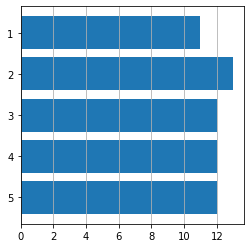

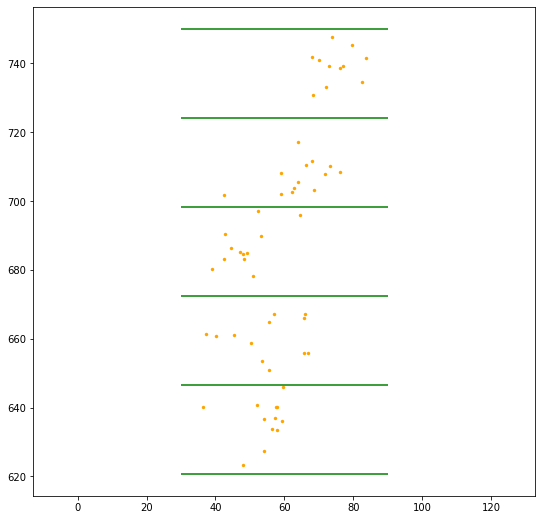

,NAMN,GISHektar,Lannamn,CenterX,CenterY,Kommunnamn,Metod,Kvalitet,Kommentar,OBJECTID,quality,summary,link
id,,,,,,,,,,,,,
3,None,25,Norrbottens län,7451801.0,795352.0,Gällivare,Manuell kartering - satellit,Granskad - God,Redan karterad med dålig kvalitet,3,2.0,"This fire is located in Norrbotten and quite close to the road, it's been approved by skogsstyrselsen and is generally pretty sick!\r\n\r\nThere has been recent logging near the burn site and this...",https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7451801.0&y=795352.0&scale=600&bg=KARTA
8,None,2,Norrbottens län,7419231.0,681153.0,Jokkmokk,Manuell kartering - satellit,Granskad - God,None,8,3.0,Pretty good!,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7419231.0&y=681153.0&scale=600&bg=KARTA
10,None,0,Norrbottens län,7408632.0,701085.0,Jokkmokk,Manuell kartering - satellit,Granskad - God,None,10,2.0,Seems good but small,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7408632.0&y=701085.0&scale=600&bg=KARTA
11,None,10,Norrbottens län,7385089.0,761983.0,Jokkmokk,Manuell kartering - satellit,Granskad - God,None,11,3.0,Looks good!,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7385089.0&y=761983.0&scale=600&bg=KARTA
13,None,1,Norrbottens län,7346198.0,825294.0,Luleå,Manuell kartering - satellit,Granskad - God,None,13,3.0,Looks good,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7346198.0&y=825294.0&scale=600&bg=KARTA
14,None,1,Norrbottens län,7332414.0,720730.0,Jokkmokk,Manuell kartering - satellit,Granskad - God,None,14,2.0,"Trees look thin, but seemed to always be that way with not evidence of logging.",https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7332414.0&y=720730.0&scale=600&bg=KARTA
19,None,6,Västerbottens län,7171921.0,641184.0,Lycksele,Manuell kartering - satellit,Granskad - God,None,19,3.0,"long walk however, 1.77 km",https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7171921.0&y=641184.0&scale=600&bg=KARTA
25,None,1,Västerbottens län,7116381.0,680579.0,Lycksele,Manuell kartering - satellit,Granskad - God,None,25,2.0,On a small slope with planned logging,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7116381.0&y=680579.0&scale=600&bg=KARTA
32,None,4,Västerbottens län,7084965.0,762977.0,Umeå,Manuell kartering - satellit,Granskad - God,None,32,3.0,"nice, near town, somewhat long walk",https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7084965.0&y=762977.0&scale=600&bg=KARTA


In [33]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
#>name = '/home/johan/Desktop/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
df = db.read("SELECT * FROM fires_fire")
db.disconnect
df = df.drop([ "Producent", "Lopnr", "Laddatum", "Aktualitet", "shape_STAr", "shape_STLe"], axis = 1)
df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=600&bg=KARTA"




def selected(df):
    df = df[df.quality >= 2]
    return df
def unselected(df):
    df = df[df.quality.isnull()]
    #df = df[df.GISHektar > 3]
    df = df.sort_values(by=['CenterY'])
    return df
def zone(df, zone):
    df = df[df.CenterX < lines[-1+zone]*10000]
    df = df[df.CenterX > lines[0+zone]*10000]
    return df
def slope(df):
    df2 = Dbf5('/home/johan/Desktop/confused/firesites.dbf').to_dataframe()
    df2 = df2[df2.slope10 == 1]
    df2 = df2[df2.slope30 == 0]
    df = df[df.OBJECTID.isin(df2.OBJECTID)]
    return df

sites_per_zone(df, lines)
df = selected(df)
#df = unselected(df)
#df = zone(df,1)
#df = slope(df)

#df = df[df.OBJECTID.isin([100,325,161,131,171,124])] #OLD GROWTH
print("Total fires: {}".format(len(df.index)))
plot(df, lines)

display(df)



In [5]:
name = '/Users/johan/Documents/Programming/skogsbrand/db.sqlite3'

#df = calculate_walk(name)
#display(df)
#for index, row in df.iterrows(): print("UPDATE fires_site SET walk = {} WHERE id = {};".format(row['Walk'], index+1))

In [6]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
#df = db.read("SELECT * FROM fires_site ORDER BY fire_id")
df = db.read("SELECT * FROM fires_fire WHERE id IN (123, 170, 130, 160, 324, 99, 137) ORDER BY id")
db.disconnect
df = df.drop(["summary", "Producent", "Lopnr", "Laddatum", "Aktualitet", "shape_STAr", "shape_STLe"], axis = 1)
df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=37502.2872&bg=KARTA"

#df.to_csv("/home/johan/Desktop/parking_sites.csv")
display(df)

,NAMN,GISHektar,Lannamn,CenterX,CenterY,Kommunnamn,Metod,Kvalitet,Kommentar,OBJECTID,quality,link
id,,,,,,,,,,,,
99,None,88,Västerbottens län,7175755.0,631677.0,Lycksele,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,99,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7175755.0&y=631677.0&scale=37502.2872&bg=KARTA
123,None,16,Kronobergs län,6303240.0,526381.0,Lessebo,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,123,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6303240.0&y=526381.0&scale=37502.2872&bg=KARTA
130,None,28,Kalmar län,6369859.0,571743.0,Oskarshamn,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,130,2.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6369859.0&y=571743.0&scale=37502.2872&bg=KARTA
137,None,51,Norrbottens län,7380131.0,859943.0,Överkalix,Manuell kartering - satellit,Granskad - God,ny kartering av Metria polygon med mindre justeringar,137,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7380131.0&y=859943.0&scale=37502.2872&bg=KARTA
160,None,1,Gävleborgs län,6876181.0,546120.0,Ljusdal,Manuell kartering - satellit,Granskad - God,None,160,NaN,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6876181.0&y=546120.0&scale=37502.2872&bg=KARTA
170,None,1,Dalarnas län,6791971.0,517157.0,Rättvik,Manuell kartering - satellit,Granskad - God,None,170,NaN,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6791971.0&y=517157.0&scale=37502.2872&bg=KARTA
324,None,31,Västerbottens län,7100306.0,731717.0,Vännäs,Manuell kartering - satellit,Granskad - God,"Brand utmed järnväg, består av flera mindre områden (multi part features)",324,3.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7100306.0&y=731717.0&scale=37502.2872&bg=KARTA


In [35]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
df2 = db.read("SELECT * FROM fires_site ORDER BY fire_id")
db.disconnect

df1 = pd.read_csv("/home/johan/Desktop/confused/points_sweref.csv", index_col=1)
df = pd.read_csv("/home/johan/Desktop/confused/ge_samplesites_pts.csv", index_col=1)
df['X'] = df1['POINT_X']
df['Y'] = df1['POINT_Y']

df = df[df.latitude != df.POINT_Y]
df = df.drop(["FID","parking_id","comment", "walk","rank", "latitude", "longitude"], axis = 1)
df = df.rename(index=str, columns={"POINT_X": "longitude", "POINT_Y": "latitude"})
df2.to_csv("/home/johan/Desktop/allpoints.csv")
df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.Y.astype(str)+"&y="+df.X.astype(str)+"&scale=37502.2872&bg=KARTA"
print("Total fires: {}".format(len(df.index)))
display(df2)

Total fires: 60


,type,latitude,longitude,fire_id,parking_id,comment,walk,rank
id,,,,,,,,
1,burnt,67.038850,21.796480,3,2,It might be close to logged area and has impact because of this. The walk is short and over likely easy terrain.,669,1
2,control,67.041020,21.787890,3,2,None,1097,1
3,control,67.040002,21.804152,3,2,None,536,2
117,burnt,66.837371,19.128974,8,60,,123,1
118,control,66.836392,19.129103,8,60,,102,1
21,burnt,66.791820,19.100770,9,10,,256,1
22,control,66.793140,19.099280,9,10,,290,1
149,burnt,66.730007,19.564635,10,76,,50,1
150,control,66.730265,19.565177,10,76,,50,1


In [9]:
pd.set_option('display.max_columns', 500)

df = Dbf5('/home/johan/Desktop/firesites.dbf').to_dataframe()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/johan/Desktop/firesites.dbf'

In [ ]:
df = pd.read_csv("/home/johan/Desktop/new_points.csv", index_col=0)
for index, row in df.iterrows():
    pass#print('UPDATE fires_site SET latitude = {}, longitude = {} WHERE id = {};'.format(row['latitude'],row['longitude'],index))